In [3]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.vgg16 import VGG16
#from keras.applications.vgg16 import preprocess_input
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [5]:
train_path = 'D:/sem7/sgp/train'
valid_path = 'D:/sem7/sgp/val'

In [6]:
# add preprocessing layer to the front of InceptionResNetV2
incres = InceptionResNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

219062272/219055592 [==============================] - 84s 0us/step


In [7]:
# don't train existing weights
for layer in incres.layers:
  layer.trainable = False

In [8]:
# useful for getting number of classes
folders = glob('D:/sem7/sgp/train/*')

In [9]:
# our layers - you can add more if you want
x = Flatten()(incres.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [10]:
# create a model object
model = Model(inputs=incres.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 12, 12, 160)  480         conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 12, 12, 160)  0           batch_normalization_94[0][0]     
__________________________________________________________________________________________________
conv2d_92 (Conv2D)              (None, 12, 12, 192)  208896      block17_4_ac[0][0]               
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 12, 12, 192)  215040      activation_94[0][0]              
__________________________________________________________________________________________________
batch_normalization_92 (BatchNo (None, 12, 12, 192)  576         conv2d_92[0][0]                  
__________

block17_11_ac (Activation)      (None, 12, 12, 1088) 0           block17_11[0][0]                 
__________________________________________________________________________________________________
conv2d_121 (Conv2D)             (None, 12, 12, 128)  139264      block17_11_ac[0][0]              
__________________________________________________________________________________________________
batch_normalization_121 (BatchN (None, 12, 12, 128)  384         conv2d_121[0][0]                 
__________________________________________________________________________________________________
activation_121 (Activation)     (None, 12, 12, 128)  0           batch_normalization_121[0][0]    
__________________________________________________________________________________________________
conv2d_122 (Conv2D)             (None, 12, 12, 160)  143360      activation_121[0][0]             
__________________________________________________________________________________________________
batch_norm

batch_normalization_171 (BatchN (None, 5, 5, 192)    576         conv2d_171[0][0]                 
__________________________________________________________________________________________________
batch_normalization_174 (BatchN (None, 5, 5, 256)    768         conv2d_174[0][0]                 
__________________________________________________________________________________________________
activation_171 (Activation)     (None, 5, 5, 192)    0           batch_normalization_171[0][0]    
__________________________________________________________________________________________________
activation_174 (Activation)     (None, 5, 5, 256)    0           batch_normalization_174[0][0]    
__________________________________________________________________________________________________
block8_3_mixed (Concatenate)    (None, 5, 5, 448)    0           activation_171[0][0]             
                                                                 activation_174[0][0]             
__________

Total params: 54,720,746
Trainable params: 384,010
Non-trainable params: 54,336,736
__________________________________________________________________________________________________


In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2601 images belonging to 10 classes.
Found 657 images belonging to 10 classes.


In [14]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
82/82 [==============================] - 952s 12s/step - loss: 3.8981 - accuracy: 0.5890 - val_loss: 1.9056 - val_accuracy: 0.7397
Epoch 2/5
82/82 [==============================] - 1033s 13s/step - loss: 1.9563 - accuracy: 0.7562 - val_loss: 1.4246 - val_accuracy: 0.8082
Epoch 3/5
82/82 [==============================] - 691s 8s/step - loss: 1.3269 - accuracy: 0.8155 - val_loss: 1.8869 - val_accuracy: 0.8037
Epoch 4/5
82/82 [==============================] - 640s 8s/step - loss: 1.6051 - accuracy: 0.8158 - val_loss: 2.4508 - val_accuracy: 0.7839
Epoch 5/5
82/82 [==============================] - 634s 8s/step - loss: 1.3105 - accuracy: 0.8393 - val_loss: 2.7587 - val_accuracy: 0.7671


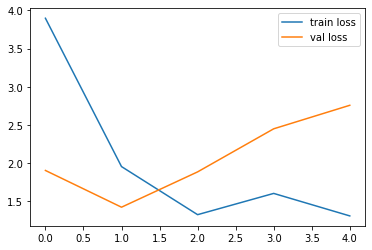

<Figure size 432x288 with 0 Axes>

In [15]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

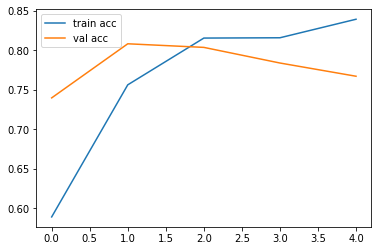

<Figure size 432x288 with 0 Axes>

In [16]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
import tensorflow as tf

from keras.models import load_model

model.save('output/InceptionResNetV2_model.h5')